### Predicting health insurance expenses in US

#### Loading Libraries

In [1]:
from pycaret.datasets import get_data
from pycaret.regression import *

#### Loading Dataset

In [2]:
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Creating Setup

In [3]:
setup = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
setup[0].columns

Index(['bmi_Power2', 'age_Power2', 'sex_female', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_no',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_11.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0',
       'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_11.0',
       'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0',
       'bmi_8.0', 'bmi_9.0', 'bmi_Power2_multiply_children_2',
       'age_6.0_multiply_age_Power2', 'smoker_no_multiply_age_Power2',
       'region_southeast_multiply_smoker_no', 'children_1_multiply_bmi_Power2',
       'age_0.0_multiply_smoker_no', 'bmi_Power2_multiply_children_0',
       'age_Power2_multiply_children_0', 'children_0_multiply_bmi_Power2',
       'age_Power2_multiply_smoker_no', 'sex_female_multiply_bmi_Power2',
       'smoker_no_multiply_bmi_Power2', 'bmi_Power2_

#### Modeling with XGBOOST Regressor

In [11]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2750.1319,2.152960e+07,4639.9995,0.8714,0.4647,0.3597
1,3021.5755,3.188253e+07,5646.4617,0.8146,0.4515,0.2921
2,2895.4571,2.592967e+07,5092.1179,0.6717,0.5489,0.4102
3,2977.8423,2.202199e+07,4692.7592,0.8161,0.4823,0.4313
4,2992.2723,2.667952e+07,5165.2220,0.8016,0.4684,0.3084
5,2548.5312,1.968146e+07,4436.3790,0.8734,0.3404,0.2325
6,2453.5882,1.914309e+07,4375.2818,0.8697,0.3720,0.2920
7,2795.3549,2.632944e+07,5131.2218,0.8552,0.4480,0.2807
8,2585.5797,2.313995e+07,4810.3999,0.8505,0.4259,0.3292
9,2761.5645,2.574095e+07,5073.5535,0.8342,0.5127,0.3682


In [12]:
tuned_xgboost = tune_model('xgboost',optimize = 'mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3001.6688,2.745466e+07,5239.7198,0.8360,0.5572,0.3691
1,3350.4703,3.492975e+07,5910.1394,0.7969,0.4839,0.3778
2,3419.5579,3.232341e+07,5685.3681,0.5907,0.7281,0.5040
3,3246.3492,2.714521e+07,5210.1062,0.7733,0.5688,0.4909
4,3734.5976,3.923955e+07,6264.1479,0.7082,0.7907,0.4399
5,2937.5919,2.445299e+07,4944.9964,0.8427,0.4192,0.2939
6,2738.8295,2.271115e+07,4765.6216,0.8455,0.4267,0.3277
7,2908.1218,2.886503e+07,5372.6182,0.8413,0.5242,0.2926
8,2843.2365,2.422627e+07,4922.0193,0.8435,0.4600,0.3785
9,3350.6571,3.515298e+07,5928.9946,0.7736,0.7364,0.4883


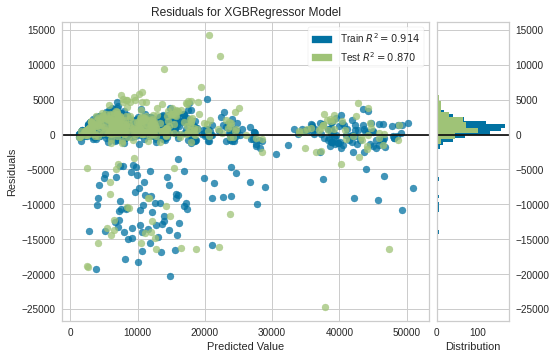

In [13]:
plot_model(xgboost)

#### Saving Model

In [14]:
save_model(xgboost, 'deployment_26062020')

Transformation Pipeline and Model Succesfully Saved


In [15]:
deployment_26062020 = load_model('deployment_26062020')

Transformation Pipeline and Model Sucessfully Loaded


In [16]:
deployment_26062020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions